# US Baby Names 1880-2010

#### Extracted (and slightly modified) from *Python for Data Analysis (Wes McKinney)*

The following datasets ([download here](http://www.ssa.gov/oact/babynames/limits.html)) contain a list of the most frequent names given to newborn babies in the United States each year.
There are many things you might want to do with the dataset:

* Visualize the proportion of babies given a particular name (your own, or another name) over time.
* Determine the relative rank of a name.
* Determine the most popular names in each year or the names with largest increases or decreases.
* Analyze trends in names: vowels, consonants, length, overall diversity, changes in spelling, first and last letters.
* Analyze external sources of trends: biblical names, celebrities, demographic changes.


## Code

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Let's first open a single file and take a look at it:

In [2]:
names1880 = pd.read_csv('names/yob1880.txt', names=['name', 'sex', 'births'])

In [3]:
names1880[:5]

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


Since we have numerous data files, the following snippet combines all of these data into a single pandas DataFrame and add a *year* field. Refer to *Python for Data Analysis - page 33* for an extended description of the code below. Note that all .txt files must be stored as *./names*.

In [4]:
years = range(1880, 2013)
pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)


In [5]:
names[:5]

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


We can now perform several types of aggregation. For example, let's create a new DataFrame containing the total number of births per year, split by sex.

In [6]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [7]:
total_births.head()

sex,F,M
year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445


Using the *plot* function we can very quickly draw a figure to illustrate this DataFrame.

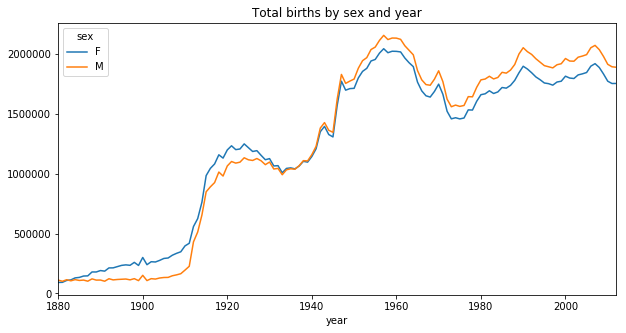

In [8]:
total_births.plot(figsize=(10,5),title='Total births by sex and year')

Now suppose we would like to analyse how frequently the names *John*, *Michael*, *Mary*, *Mark*,*Jeremy* and *Amelia* occurr over time.

First we redefine *total_births*, this time aggregating data by *name* rather than *sex*. Then we grab the subset of names that we are interested in and plot it.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021C6F98DD30>,
      dtype=object)

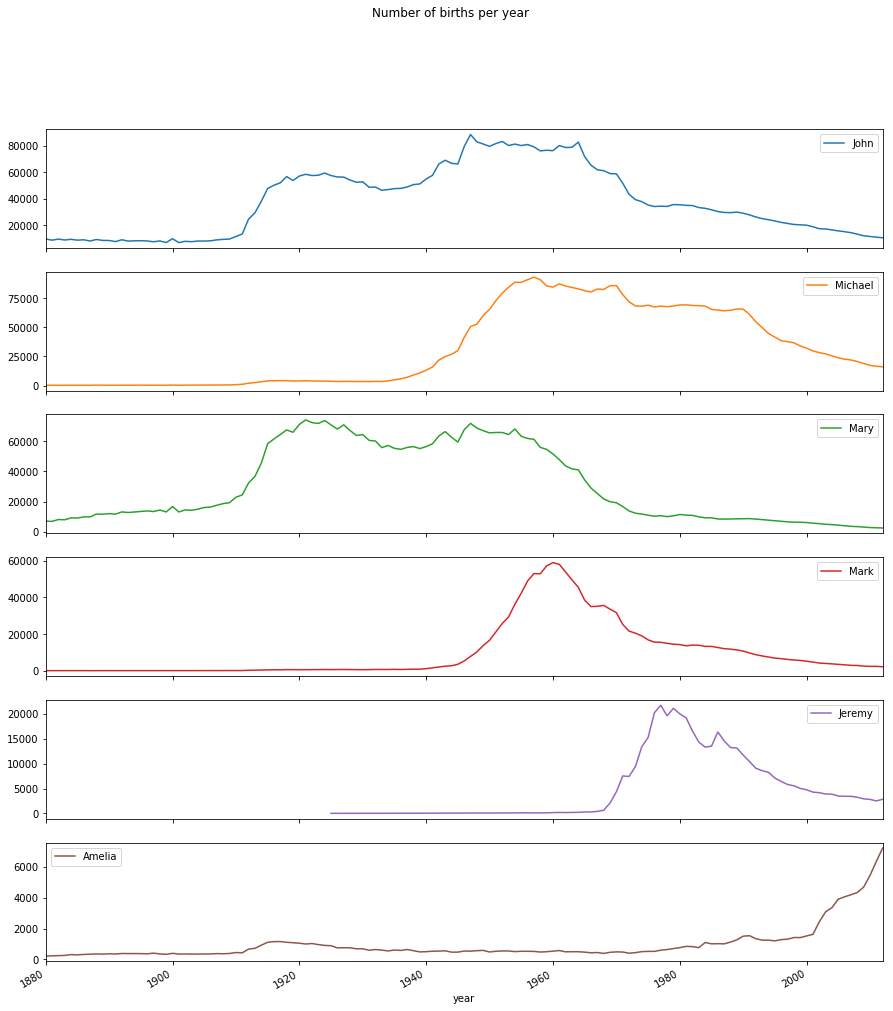

In [11]:
total_births = names.pivot_table('births', index='year', columns='name', aggfunc=sum)
subset = total_births[['John', 'Michael', 'Mary', 'Mark','Jeremy','Amelia']]
subset.plot(subplots=True, figsize=(15, 17), grid=False,title="Number of births per year")

We can also look at how the distribution of boy names by final letter has changed over the last 100 years. To see this, we first aggregate all of the births in the full dataset by year, sex, and final letter.



In [12]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
table = names.pivot_table('births', index=last_letters,columns=['sex', 'year'], aggfunc=sum)


Then we select a few representative years, spanning 100 years in total:

In [13]:
subtable = table.reindex(columns=[1912, 1962, 2012], level='year')
subtable.head()

sex                 F                            M                    
year             1912      1962      2012     1912      1962      2012
last_letter                                                           
a            149171.0  682510.0  653279.0   1655.0    5335.0   27136.0
b                 NaN     459.0     471.0    923.0    3458.0   34626.0
c                 NaN      73.0    1233.0   1052.0   17877.0   24209.0
d             10523.0    3670.0    2517.0  54091.0  250017.0   42376.0
e            180519.0  424754.0  319884.0  54716.0  164971.0  128174.0

Further, we normalize the table by the number of births, so as to obtain the proportion of total births for each sex ending in each letter:

In [14]:
letter_prop = subtable / subtable.sum().astype(float)
letter_prop.head()

sex                 F                             M                    
year             1912      1962      2012      1912      1962      2012
last_letter                                                            
a            0.267282  0.347060  0.372468  0.003849  0.002579  0.014362
b                 NaN  0.000233  0.000269  0.002147  0.001671  0.018326
c                 NaN  0.000037  0.000703  0.002447  0.008641  0.012813
d            0.018855  0.001866  0.001435  0.125809  0.120843  0.022428
e            0.323451  0.215990  0.182382  0.127263  0.079737  0.067838

With the letter proportions now in hand, we can make bar plots for each sex broken-down by year


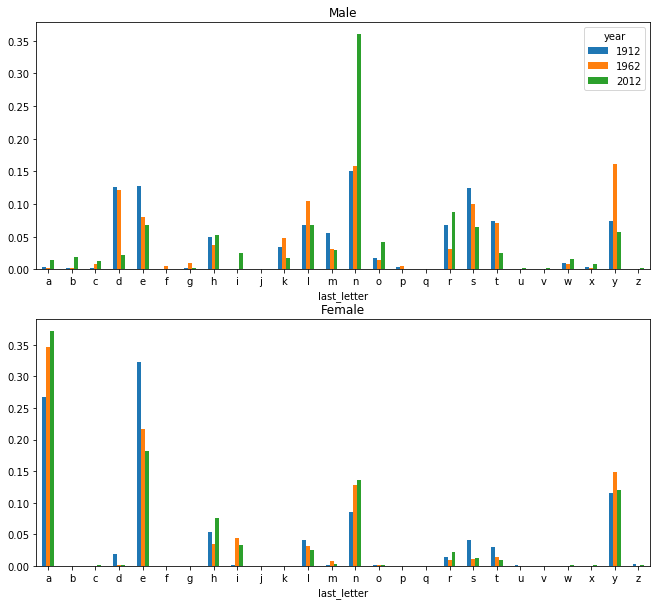

In [15]:
fig, axes = plt.subplots(2, 1, figsize=(11, 10))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',legend=False)
